In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [28]:
dataset = pd.read_csv('/users/he145100/emergency_episode_50k_less_rows.csv', dtype={'destination_on_departure'
                                                                               : 'str',
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str'})

In [8]:
list(dataset.columns)

['establishment_code',
 'sex',
 'ethnicity',
 'marital_status',
 'interpreter_required',
 'employment_status',
 'occupation',
 'triage_category',
 'departure_status',
 'destination_on_departure',
 'visit_type',
 'mode_of_arrival',
 'referral_source',
 'primary_diagnosis',
 'presenting_complaint',
 'major_diagnostic_category',
 'human_intent_of_injury',
 'feeder_system',
 'external_cause_of_injury',
 'state',
 'referred_to_on_departure',
 'additional_diagnosis',
 'short_stay_unit_destination_on_departure',
 'short_stay_unit_departure_status',
 'claim_type',
 'record_status',
 'treating_doctor_type',
 'senior_doctor_type',
 'place_where_injury_occurred',
 'type_of_activity_when_injury_occurred',
 'ambulance_number',
 'statistical_area_2_2016',
 'payment_classification',
 'aboriginality',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'additional_diagnosis_system_code_EDIS',
 'standard_australian_classification_of_countries_2011_for_country_of_birth',
 'au

In [29]:
dataset.shape

(50000, 69)

In [30]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (47500, 69)
Unseen Data For Predictions: (2500, 69)


In [31]:
from pycaret.classification import *

In [49]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         ignore_features=['attendance_length_of_episode','waiting_time_for_clinical_care_commencement',
                                         'destination_on_departure','referred_to_on_departure', 'departure_status'],
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         bin_numeric_features = ['age'],
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(47500, 69)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,60
8,Ordinal Features,True
9,High Cardinality Features,True


In [50]:
best_model = compare_models(exclude = ['lr', 'qda', 'lda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9500,0.9903,0.9259,0.9031,0.9143,0.8790,0.8792,27.2990
lightgbm,Light Gradient Boosting Machine,0.9497,0.9904,0.9290,0.8999,0.9142,0.8787,0.8789,0.5670
catboost,CatBoost Classifier,0.9495,0.9898,0.9287,0.8995,0.9138,0.8782,0.8784,3.9740
gbc,Gradient Boosting Classifier,0.9428,0.9871,0.9083,0.8949,0.9015,0.8612,0.8613,11.7240
ada,Ada Boost Classifier,0.9370,0.9854,0.8788,0.9002,0.8893,0.8452,0.8454,7.8990
et,Extra Trees Classifier,0.9345,0.9820,0.8769,0.8938,0.8853,0.8395,0.8396,6.2480
rf,Random Forest Classifier,0.9334,0.9824,0.8713,0.8949,0.8829,0.8364,0.8366,3.8290
dt,Decision Tree Classifier,0.9279,0.9127,0.8767,0.8737,0.8751,0.8244,0.8245,0.9830
ridge,Ridge Classifier,0.9277,0.0000,0.8473,0.8962,0.8710,0.8208,0.8215,1.3950
nb,Naive Bayes,0.8912,0.9556,0.8551,0.7861,0.8191,0.7415,0.7429,0.8110


In [51]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9519,0.9913,0.9196,0.9139,0.9168,0.8829,0.8829
1,0.9441,0.9896,0.9238,0.8868,0.9049,0.8653,0.8657
2,0.9489,0.9906,0.9322,0.8948,0.9131,0.8769,0.8773
3,0.9531,0.9914,0.9332,0.9067,0.9198,0.8866,0.8868
4,0.9486,0.9900,0.9374,0.8900,0.9131,0.8766,0.8772
5,0.9528,0.9909,0.9342,0.9050,0.9194,0.8860,0.8862
6,0.9486,0.9907,0.9290,0.8963,0.9124,0.8760,0.8763
7,0.9501,0.9904,0.9175,0.9099,0.9137,0.8786,0.8786
8,0.9489,0.9887,0.9322,0.8948,0.9131,0.8769,0.8773


In [53]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [54]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9555,0.9920,0.9228,0.9228,0.9228,0.8915,0.8915
1,0.9498,0.9898,0.9301,0.8991,0.9143,0.8788,0.8791
2,0.9507,0.9906,0.9311,0.9010,0.9158,0.8809,0.8812
3,0.9531,0.9914,0.9301,0.9092,0.9195,0.8864,0.8865
4,0.9474,0.9900,0.9228,0.8975,0.9099,0.8728,0.8729
5,0.9525,0.9912,0.9353,0.9032,0.9190,0.8854,0.8856
6,0.9528,0.9907,0.9353,0.9041,0.9194,0.8861,0.8863
7,0.9513,0.9898,0.9134,0.9172,0.9153,0.8811,0.8811
8,0.9477,0.9887,0.9301,0.8928,0.9110,0.8740,0.8744


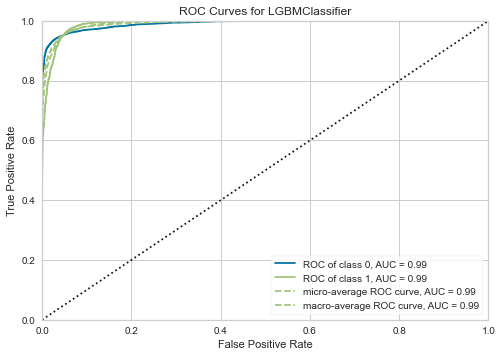

In [55]:
plot_model(tuned_lightgbm, plot = 'auc')

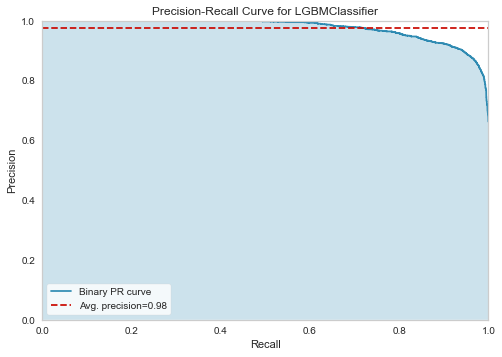

In [56]:
plot_model(tuned_lightgbm, plot = 'pr')

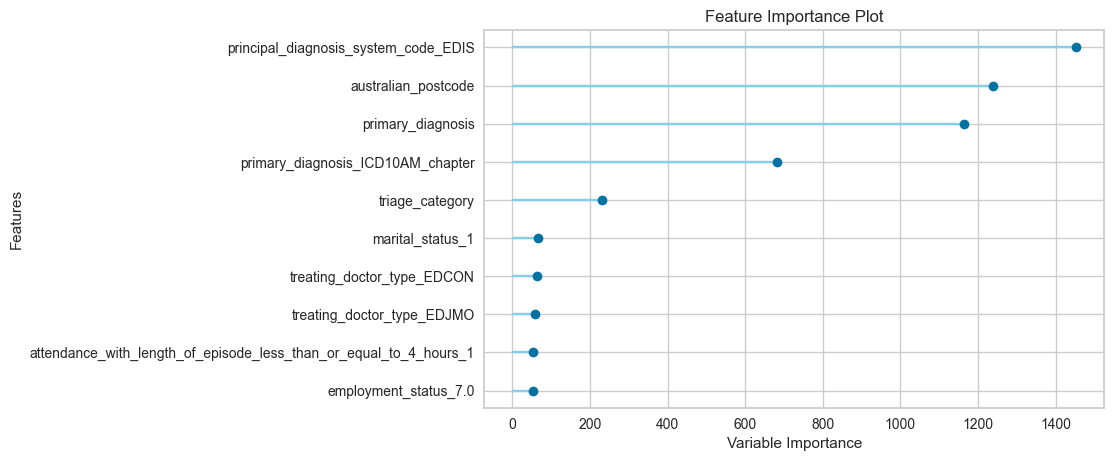

In [57]:
plot_model(tuned_lightgbm, plot='feature')

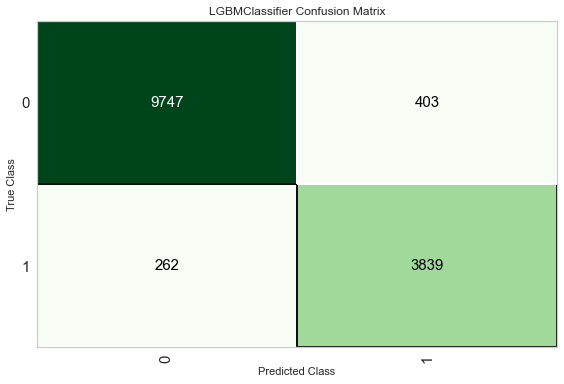

In [58]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [59]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9533,0.9906,0.9361,0.9050,0.9203,0.8873,0.8876


,occupation,triage_category,primary_diagnosis,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,establishment_code_105,establishment_code_106,establishment_code_277,establishment_code_642,...,age_3.0,age_4.0,age_5.0,age_6.0,age_7.0,age_8.0,age_9.0,admission,Label,Score
0,87.637177,3.0,402.0,1361.0,294.0,6025.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9991
1,87.637177,2.0,145.0,290.0,134.0,6210.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9711
2,87.637177,4.0,217.0,6600.0,217.0,6050.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.7947
3,87.637177,3.0,94.0,1361.0,94.0,6169.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9987
4,87.637177,2.0,297.0,6600.0,116.0,6025.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,87.637177,3.0,8.0,2010.0,1.0,6210.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9758
14247,87.637177,2.0,39.0,8623.0,23.0,6027.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.9996
14248,87.637177,3.0,124.0,2010.0,124.0,6055.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9702
14249,87.637177,4.0,395.0,6600.0,321.0,6170.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9989


In [62]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [63]:
#Final Random Forest model parameters for deployment
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [2]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

NameError: name 'predict_model' is not defined

In [65]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.9532